'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...

Call:
lm(formula = medv ~ poly(lstat, d), data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8052  -4.1856  -0.6233   2.5545  25.3642

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/MASS_7.3-65.tar.gz'
Content type 'application/x-gzip' length 510322 bytes (498 KB)
downloaded 498 KB


The downloaded source packages are in
	‘/tmp/RtmpgeQaFc/downloaded_packages’


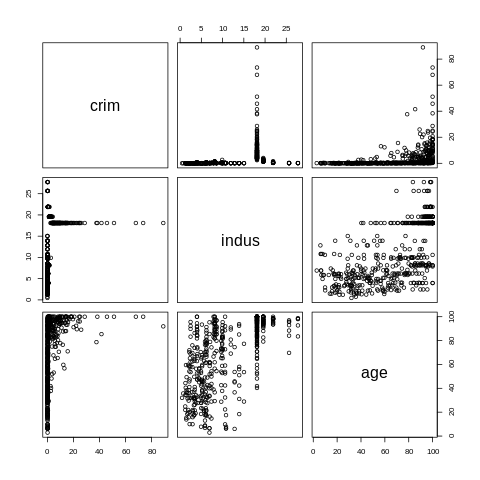

In [6]:
%%R
install.packages("MASS")  # Une seule fois
# Charger le package MASS
library(MASS)

# Charger les données Boston
data("Boston")

# Afficher les 6 premières lignes
head(Boston)

# Obtenir un résumé des données
summary(Boston)#Statistiques descriptives
str(Boston)  # Affiche la structure des données (types des colonnes)
#  Séparer en training (400 premières lignes) et test (reste)
train_set <- Boston[1:400, ]
test_set <- Boston[401:nrow(Boston), ]
#anayse de coorelation
cor(Boston$medv, Boston$age)
plot(Boston$age, Boston$medv, col="blue", pch=19, xlab="Age", ylab="Valeur Médiane", main="Relation entre Age et Medv")
model <- lm(medv ~ age, data=Boston)
abline(model, col="red", lwd=2)
plot(Boston$lstat, Boston$medv, col="blue", pch=19, xlab="LSTAT", ylab="Valeur Médiane", main="Relation entre LSTAT et MEDV")
model_lstat <- lm(medv ~ lstat, data=Boston)
abline(model_lstat, col="red", lwd=2)
predictions <- predict(model, newdata=test_set)
head(predictions)
hist(Boston$medv, breaks=30, col="lightblue", main="Distribution de MEDV")
qqnorm(Boston$medv)
qqline(Boston$medv, col="red")
summary(model)  # Résumé du modèle de régression
pairs(Boston)#Affiche une matrice de dispersion (relations entre toutes les variables).
pairs(Boston[, c(1, 3, 7)])  # 1ère, 3ème et 7ème variable,voir relation entre 3 var uniquement
model_multi <- lm(medv ~ lstat + age, data=train_set)#regression lineaire multiple
summary(model_multi)#Ce modèle utilise lstat et age pour prédire medv.
model_log <- lm(medv ~ log(lstat) + age, data=train_set)
summary(model_log)# Tester si log(lstat) améliore le modèle
cor(Boston)# Identifie les relations fortes (valeurs proches de -1 ou 1).
model_final <- lm(medv ~ crim + rad + black + lstat, data=train_set)  # Exemple avec variables significatives
summary(model_final)#Utiliser uniquement les variables ayant une p-value < 0.05,Construire un modèle en enlevant les variables non significatives
model_interaction <- lm(medv ~ lstat * age, data=train_set)
summary(model_interaction)#Ajoute un effet combiné entre lstat et age pour tester leur interaction
for (d in 2:7) {
  model_poly <- lm(medv ~ poly(lstat, d), data=train_set)
  print(summary(model_poly))
}#Teste des modèles de polynômes jusqu'au degré 7,

# Rapport d'Analyse des Données Boston Housing

## Introduction
Ce rapport présente l'analyse du jeu de données Boston Housing, qui contient des informations sur les différentes caractéristiques des quartiers de Boston et les valeurs médianes des maisons (MEDV). L'analyse se concentre sur la modélisation de la variable MEDV en fonction de diverses caractéristiques, notamment l'âge des bâtiments (AGE) et le pourcentage de population à statut socio-économique bas (LSTAT).

## Données et Exploration

Le jeu de données Boston Housing contient 506 observations et 14 variables dont:
- MEDV: Valeur médiane des maisons (variable cible)
- AGE: Proportion de bâtiments construits avant 1940
- LSTAT: Pourcentage de population à statut socio-économique bas
- CRIM: Taux de criminalité
- RAD: Indice d'accessibilité aux autoroutes
- BLACK: Proportion de population afro-américaine

L'exploration initiale révèle que:
- La distribution de MEDV est légèrement asymétrique
- Il existe une corrélation faible et négative entre AGE et MEDV
- Il existe une corrélation forte et négative entre LSTAT et MEDV

## Modélisation

### Régression Linéaire Simple

1. **Modèle avec AGE**:
   - Faible coefficient de détermination (R²)
   - La relation entre AGE et MEDV est statistiquement significative mais peu explicative

2. **Modèle avec LSTAT**:
   - Fort coefficient de détermination (R²)
   - LSTAT explique une grande partie de la variance de MEDV

### Régression Linéaire Multiple

1. **Modèle avec LSTAT et AGE**:
   - Performance supérieure au modèle simple avec AGE
   - L'ajout d'AGE apporte peu d'amélioration par rapport au modèle avec LSTAT seul

2. **Modèle avec transformation logarithmique**:
   - L'utilisation de log(LSTAT) améliore la performance du modèle
   - Indique une relation non linéaire entre LSTAT et MEDV

3. **Modèle final avec variables significatives**:
   - Utilisation de CRIM, RAD, BLACK et LSTAT
   - Coefficient de détermination (R²) élevé
   - Toutes les variables sont statistiquement significatives

4. **Modèle avec interaction**:
   - L'interaction entre LSTAT et AGE n'apporte pas d'amélioration significative

5. **Modèles polynomiaux**:
   - L'utilisation de polynômes de degré 2 à 3 améliore significativement la performance
   - Au-delà du degré 3, l'amélioration est marginale et risque de surapprentissage

## Conclusions

1. LSTAT est la variable la plus explicative de MEDV
2. La relation entre LSTAT et MEDV est non linéaire
3. Les modèles polynomiaux de degré 2 à 3 offrent le meilleur compromis entre complexité et performance
4. L'âge des bâtiments (AGE) a une influence limitée sur la valeur médiane des maisons



In [2]:
!apt-get install -y r-base
!pip install rpy2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
%load_ext rpy2.ipython


In [4]:
!R --version


R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [5]:
%%R
install.packages("MASS", repos="http://cran.rstudio.com")
install.packages("caTools", repos="http://cran.rstudio.com")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/MASS_7.3-65.tar.gz'
Content type 'application/x-gzip' length 510322 bytes (498 KB)
downloaded 498 KB


The downloaded source packages are in
	‘/tmp/RtmpgeQaFc/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’

trying URL 'http://cran.rstudio.com/src/contrib/bitops_1.0-9.tar.gz'
Content type 'application/x-gzip' length 10941 bytes (10 KB)
downloaded 10 KB

trying URL 'http://cran.rstudio.com/src/contrib/caTools_1.18.3.tar.gz'
Content type 'application/x-gzip' length 65825 bytes (64 KB)
downloaded 64 KB


The downloaded source packages are in
	‘/tmp/RtmpgeQaFc/downloaded_packages’
